In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# READING DATASET

In [2]:
df = pd.read_csv('Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


# EXPLORING DATASET

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [4]:
if df['N'].all()>90:
    print(df['N'])

In [5]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
x = df.drop('label', axis = 1)
y = df['label']

# DATA VISUALIZATION

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
print(df.describe())

                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  


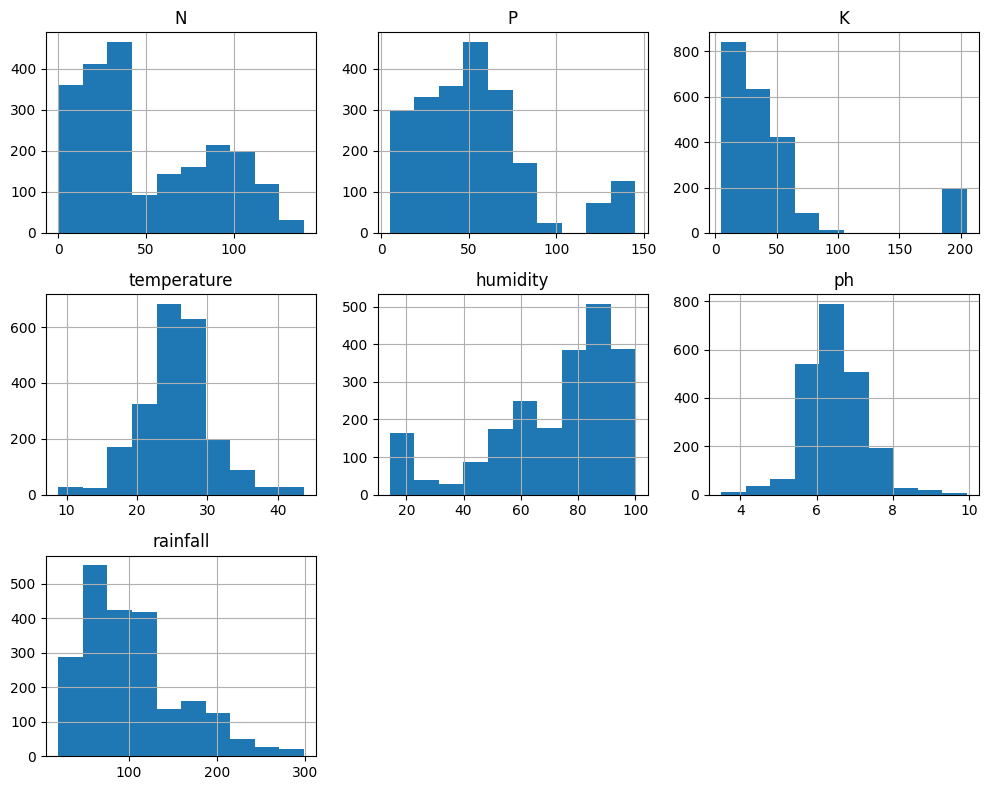

In [44]:
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()


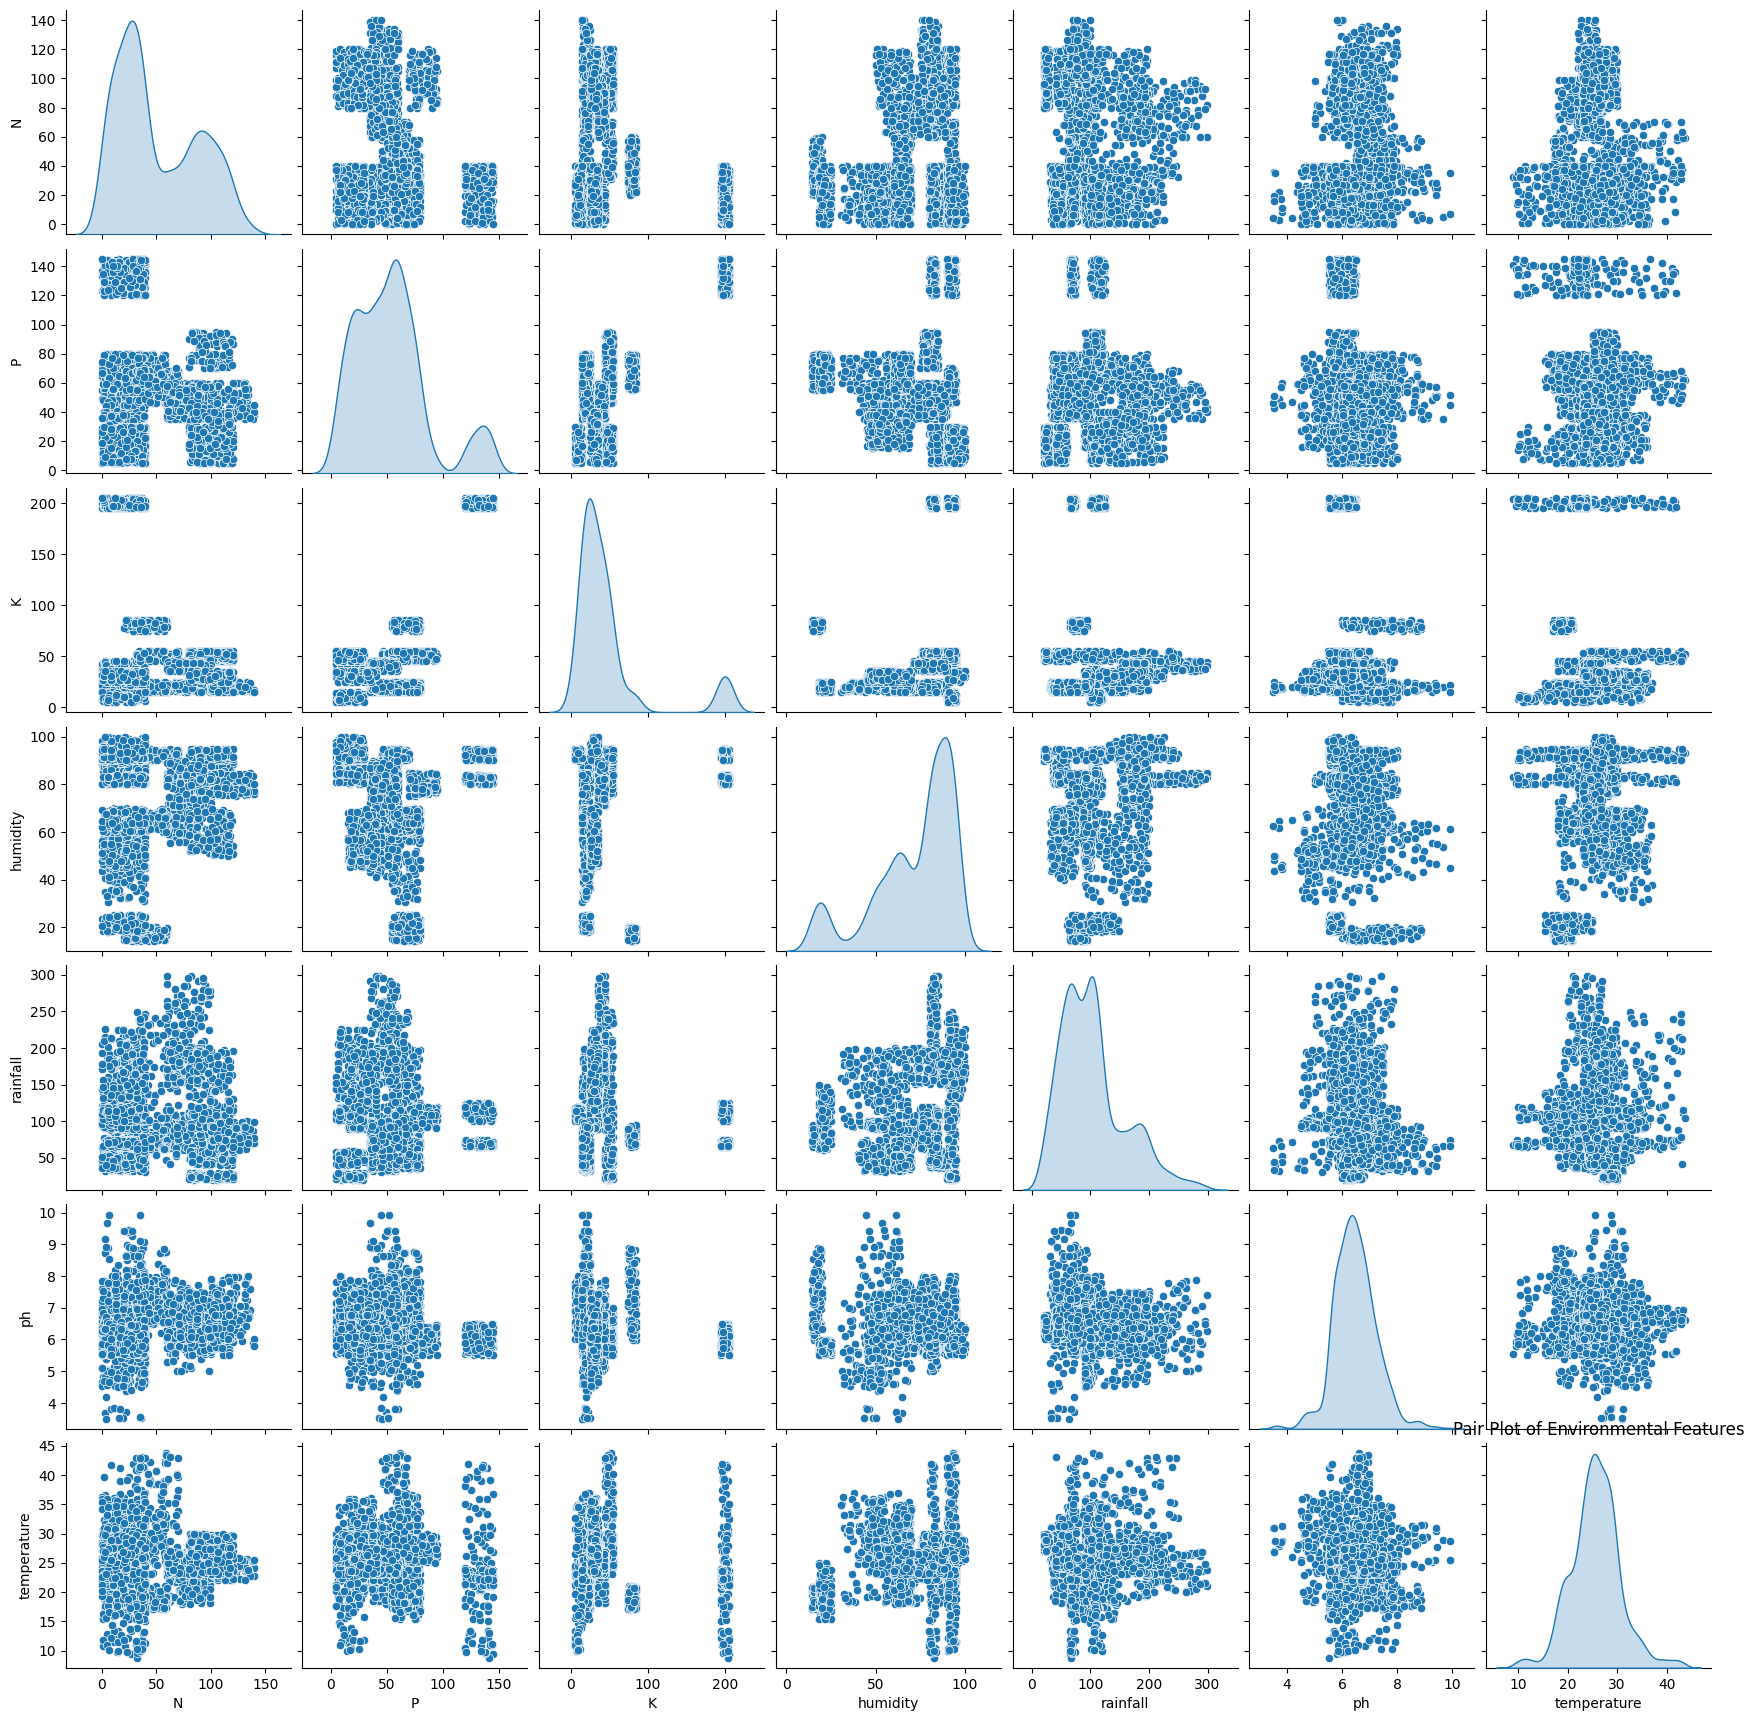

In [50]:
sns.pairplot(df[['N', 'P', 'K', 'humidity', 'rainfall', 'ph', 'temperature']], diag_kind='kde')
plt.title('Pair Plot of Environmental Features')
plt.show()

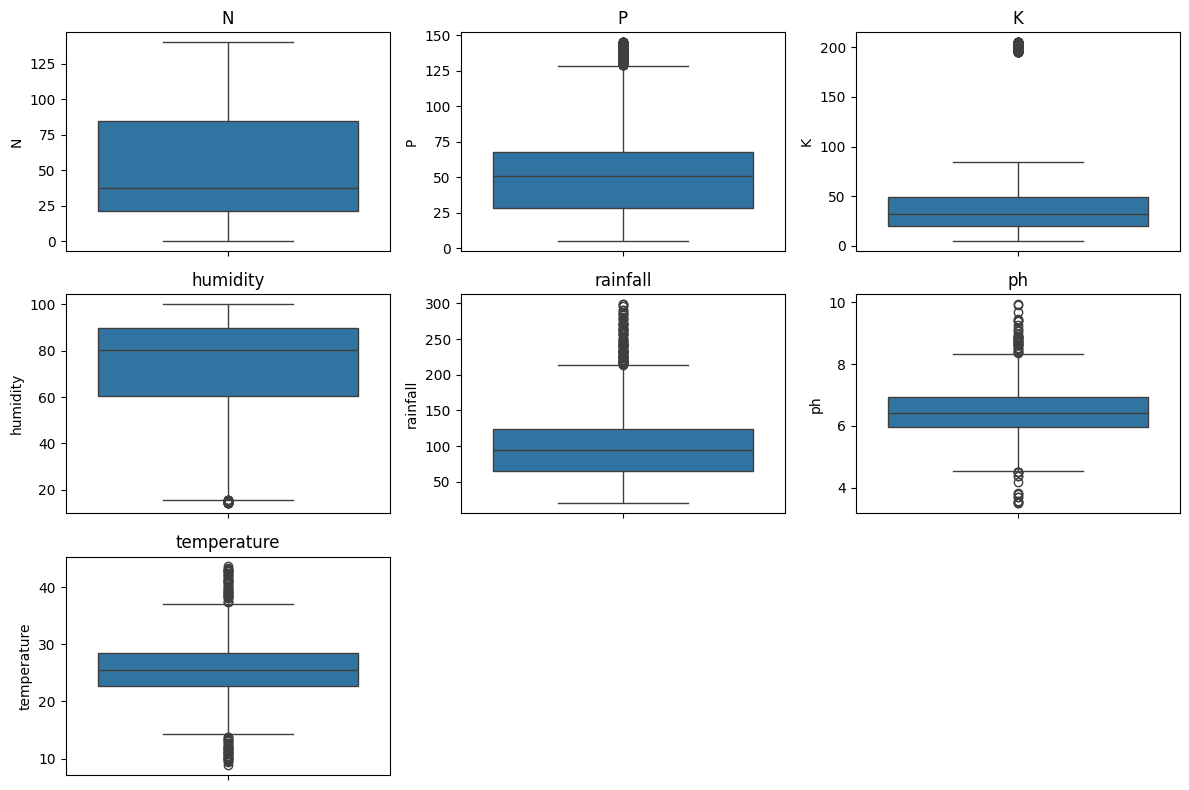

In [52]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(['N', 'P', 'K', 'humidity', 'rainfall', 'ph', 'temperature']):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(df[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

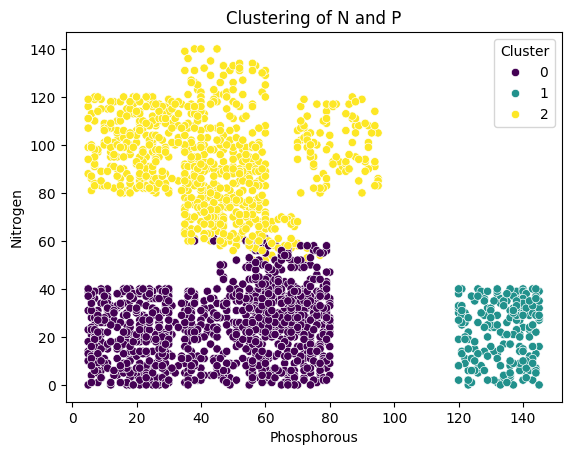

In [56]:
from sklearn.cluster import KMeans

# Example: Clustering based on N, P, K nutrients
X = df[['N', 'P', 'K']]

# Scale the data if necessary
# X_scaled = StandardScaler().fit_transform(X)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Visualize clusters
sns.scatterplot(x='P', y='N', hue='Cluster', data=df, palette='viridis')
plt.title('Clustering of N and P')
plt.xlabel('Phosphorous')
plt.ylabel('Nitrogen')
plt.show()

# DATA PRE PROCESSING AND MODELING

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, stratify = y, random_state = 1)

In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

C:\python37\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
y_pred = model.predict(x_test)

In [26]:
from sklearn.metrics import accuracy_score
logistic_acc = accuracy_score(y_test, y_pred)
print("Accuracy of logistic regression is " + str(logistic_acc))

Accuracy of logistic regression is 0.9618181818181818


In [27]:
from sklearn.tree import DecisionTreeClassifier
model_2 = DecisionTreeClassifier(criterion='entropy',max_depth = 6, random_state = 2)
model_2.fit(x_train, y_train)
y_pred_2 = model_2.predict(x_test)

In [28]:
decision_acc = accuracy_score(y_test, y_pred_2)
print("Accuracy of decision  tree is " + str(decision_acc))

Accuracy of decision  tree is 0.9781818181818182


In [29]:
from sklearn.naive_bayes import GaussianNB
model_3 = GaussianNB()
model_3.fit(x_train, y_train)
y_pred_3 = model_3.predict(x_test)

In [30]:
naive_bayes_acc = accuracy_score(y_test, y_pred_3)
print("Accuracy of naive_bayes is " + str(naive_bayes_acc))

Accuracy of naive_bayes is 0.9945454545454545


In [32]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Example data - replace with your actual data
# Assuming x_train, x_test, y_train, y_test are defined and contain the training and testing data

# Step 1: Train the RandomForestClassifier on the training data
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)  # Assuming x_train and y_train are numpy arrays or pandas DataFrame without feature names

# Step 2: Predict on the test data
# Ensure x_test is in the same format as x_train used during fitting
if isinstance(x_train, np.ndarray):
    x_test_for_pred = x_test if isinstance(x_test, np.ndarray) else x_test.values
else:
    x_test_for_pred = pd.DataFrame(x_test, columns=x_train.columns) if isinstance(x_test, np.ndarray) else x_test

y_pred_rf = rf_model.predict(x_test_for_pred)

# Step 3: Calculate and print the accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy of Random Forest is " + str(rf_accuracy))


Accuracy of Random Forest is 0.9963636363636363


In [33]:
import joblib 

In [34]:
file_name = 'crop_app'

In [35]:
joblib.dump(model_4,'crop_app')

['crop_app']

In [36]:
app = joblib.load('crop_app')

In [37]:
arr = [[90,42,43,20.879744,82.002744,6.502985,202.935536]]
acc = app.predict(arr)

In [38]:
acc

array(['rice'], dtype=object)

In [39]:
import pickle

In [40]:
Pkl_Filename = "Pickle_RL_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model_4, file)

In [41]:
with open(Pkl_Filename, 'rb') as file:  
    Pickled_Model = pickle.load(file)

Pickled_Model

RandomForestClassifier(n_estimators=25, random_state=2)